# dataframe类型

dataframe类型，表格类型

是一个二维的带标签的数组

由索引和多列数据

有行索引index和列索引Colum

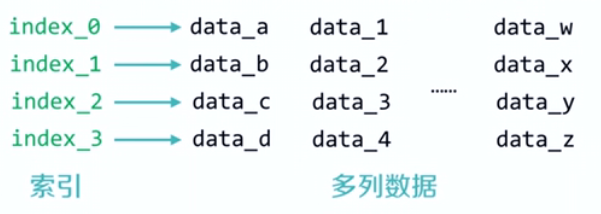



## dataframe类型的创建

### 从二维ndarray对象创建



In [2]:
import pandas as pd
import numpy as np

In [3]:
d = pd.DataFrame(np.arange(10).reshape(2,5))

In [4]:
d

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


在行生成行索引，列自动生成列索引
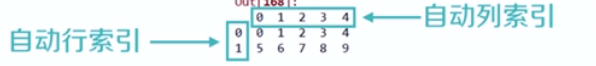

### 从Series类型的字典进行创建


In [5]:
dt = {'one':pd.Series([1,2,3],index = ['a','b','c']),
      'two':pd.Series([9,8,7,6],index = ['a','b','c','d'])}

In [10]:
dt

{'one': a    1
 b    2
 c    3
 dtype: int64,
 'two': a    9
 b    8
 c    7
 d    6
 dtype: int64}

In [13]:
p=pd.DataFrame(dt)

字典的键成为了自动列索引，index成为了自动行索引

In [14]:
p

,one,two
a,1.0,9
b,2.0,8
c,3.0,7
d,NaN,6


生成新的dataframe

数字会根据行列索引自动补齐

In [15]:
pd.DataFrame(dt,index=['b','c','d'],columns = ['two','three'])

,two,three
b,8,NaN
c,7,NaN
d,6,NaN


### 从列表类型的字典创建

In [16]:
dl = {'one':[1,2,3,4],'two':[9,8,7,6]}

In [17]:
#指定dataframe类型的行列索引
d = pd.DataFrame(dl,index = ['a','b','c','d'])

In [18]:
d

,one,two
a,1,9
b,2,8
c,3,7
d,4,6


In [22]:
d1 = {'城市':['北京','上海','广州','深圳','沈阳'],
     '环比':[101.5,101.2,101.3,102.0,100.1],
     '同比':[120.7,127.3,119.4,140.9,101.4],
     '定基':[121.4,127.8,120.0,145.5,101.6]}

In [23]:
d1

{'城市': ['北京', '上海', '广州', '深圳', '沈阳'],
 '环比': [101.5, 101.2, 101.3, 102.0, 100.1],
 '同比': [120.7, 127.3, 119.4, 140.9, 101.4],
 '定基': [121.4, 127.8, 120.0, 145.5, 101.6]}

In [40]:
d=pd.DataFrame(d1,index = ['c1','c2','c3','c4','c5'])

In [41]:
d

,城市,环比,同比,定基
c1,北京,101.5,120.7,121.4
c2,上海,101.2,127.3,127.8
c3,广州,101.3,119.4,120.0
c4,深圳,102.0,140.9,145.5
c5,沈阳,100.1,101.4,101.6


### DataFrame类型的查询

In [28]:
d.index

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [29]:
d.columns

Index(['城市', '环比', '同比', '定基'], dtype='object')

In [30]:
d.values

array([['北京', 101.5, 120.7, 121.4],
       ['上海', 101.2, 127.3, 127.8],
       ['广州', 101.3, 119.4, 120.0],
       ['深圳', 102.0, 140.9, 145.5],
       ['沈阳', 100.1, 101.4, 101.6]], dtype=object)

In [26]:
d['城市']
#返回一个Series类型

c1    北京
c2    上海
c3    广州
c4    深圳
c5    沈阳
Name: 城市, dtype: object

In [32]:
d.loc['c2']

城市       上海
环比    101.2
同比    127.3
定基    127.8
Name: c2, dtype: object

In [33]:
d['同比']['c2']

127.3

# 增删改查

## 重新索引

##### .reindex(index = None,columns =None,...)

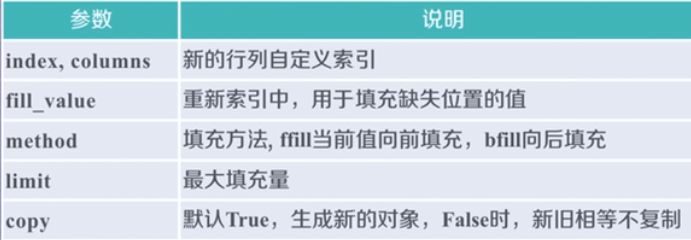

In [42]:
d

,城市,环比,同比,定基
c1,北京,101.5,120.7,121.4
c2,上海,101.2,127.3,127.8
c3,广州,101.3,119.4,120.0
c4,深圳,102.0,140.9,145.5
c5,沈阳,100.1,101.4,101.6


In [43]:
d = d.reindex(index = ['c5','c4','c3','c2','c1'])

In [44]:
d

,城市,环比,同比,定基
c5,沈阳,100.1,101.4,101.6
c4,深圳,102.0,140.9,145.5
c3,广州,101.3,119.4,120.0
c2,上海,101.2,127.3,127.8
c1,北京,101.5,120.7,121.4


In [45]:
d = d.reindex(columns = ['城市','同比','环比','定基'])

In [46]:
d

,城市,同比,环比,定基
c5,沈阳,101.4,100.1,101.6
c4,深圳,140.9,102.0,145.5
c3,广州,119.4,101.3,120.0
c2,上海,127.3,101.2,127.8
c1,北京,120.7,101.5,121.4


### 索引类型（column、index）的常用方法



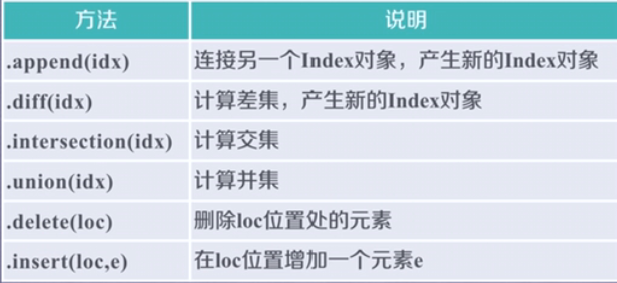

对columns列索引使用方法insert插入新列名

In [47]:
newc = d.columns.insert(4,'新增')

In [48]:
newd = d.reindex(columns = newc,fill_value = 300)

In [49]:
newd

,城市,同比,环比,定基,新增
c5,沈阳,101.4,100.1,101.6,300
c4,深圳,140.9,102.0,145.5,300
c3,广州,119.4,101.3,120.0,300
c2,上海,127.3,101.2,127.8,300
c1,北京,120.7,101.5,121.4,300


In [50]:
#删掉第三列的索引
nc = d.columns.delete(2)

In [51]:
#给第6行插入c0
ni = d.index.insert(5,'c0')

In [56]:
nd = d.reindex(index = ni,columns =nc)

In [60]:
nd=nd.ffill()

In [61]:
nd

,城市,同比,定基
c5,沈阳,101.4,101.6
c4,深圳,140.9,145.5
c3,广州,119.4,120.0
c2,上海,127.3,127.8
c1,北京,120.7,121.4
c0,北京,120.7,121.4


### 删除

##### .drop()
  
    删除整行（或整列）

默认修改0轴上的元素，一般Series类型都只有0轴

dataframe有0轴和1轴，要修改1轴上元素需要把axis =1

In [63]:
a = pd.Series([9,8,7,6],index = ['a','b','c','d'])

In [64]:
a

a    9
b    8
c    7
d    6
dtype: int64

In [65]:
a.drop(['b','c'])

a    9
d    6
dtype: int64

In [66]:
d

,城市,同比,环比,定基
c5,沈阳,101.4,100.1,101.6
c4,深圳,140.9,102.0,145.5
c3,广州,119.4,101.3,120.0
c2,上海,127.3,101.2,127.8
c1,北京,120.7,101.5,121.4


In [69]:
d.drop('环比',axis = 1)

,城市,同比,定基
c5,沈阳,101.4,101.6
c4,深圳,140.9,145.5
c3,广州,119.4,120.0
c2,上海,127.3,127.8
c1,北京,120.7,121.4
